# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: 10

Número: 59270 - Nome: Tatiana Moura 

Número: 55945 Nome: Mariana Valente

Número: 54356 Nome: Judite Ramos

## 1. Processamento dos dados

* Primeiro extraimos os dados do train.csv

In [286]:
import sklearn
import pandas as pd
import numpy as np

#ler o documento
hist_clinic_train = pd.read_csv("train.csv")
print("Dados do documento original train:")
hist_clinic_train

Dados do documento original train:


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2644,C,D-penicillamine,20296,F,N,N,N,N,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7,1.0
1,1,3492,C,Unknown,21915,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6,2.0
2,2,1702,C,D-penicillamine,18806,F,N,N,N,N,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6,1.0
3,3,3523,C,Unknown,14610,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2,2.0
4,4,3428,D,Placebo,13727,F,N,Y,Y,Y,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0,1.0
325,325,1899,C,Unknown,14975,M,Unknown,Unknown,Unknown,N,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0,4.0
326,326,1152,D,D-penicillamine,25546,M,N,Y,N,N,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9,3.0
327,327,71,D,D-penicillamine,18972,F,N,Y,Y,S,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6,4.0


* Depois extraimos os dados do test.csv

In [287]:
hist_clinic_test = pd.read_csv("test.csv")
print("Dados do documento original test:")
hist_clinic_test

Dados do documento original test:


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,329,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.000000,3.35,39.000000,1713.000000,171.000000,100.000000,234.00000,10.2
1,330,1302,C,D-penicillamine,22111,M,N,Y,N,N,6.6,1000.000000,3.07,88.000000,3150.000000,193.000000,133.000000,299.00000,10.9
2,331,1443,C,Unknown,14975,F,Unknown,Unknown,Unknown,N,1.2,369.510563,2.80,97.648387,1982.655769,122.556346,124.702128,120.00000,11.0
3,332,2944,C,D-penicillamine,14812,F,N,N,N,N,1.9,448.000000,3.83,60.000000,1052.000000,127.100000,175.000000,181.00000,9.8
4,333,3853,D,Placebo,19025,F,N,N,N,N,0.8,276.000000,3.60,54.000000,4332.000000,99.330000,143.000000,273.00000,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,407,1297,D,D-penicillamine,18719,M,N,Y,N,N,7.3,426.000000,3.93,262.000000,2424.000000,145.700000,218.000000,252.00000,10.5
79,408,2576,C,Placebo,17323,F,N,N,N,N,0.5,316.000000,3.65,68.000000,1716.000000,187.550000,71.000000,356.00000,9.8
80,409,2111,D,Unknown,19724,F,Unknown,Unknown,Unknown,N,1.0,369.510563,3.60,97.648387,1982.655769,122.556346,124.702128,257.02457,12.1
81,410,2812,D,Unknown,18628,F,Unknown,Unknown,Unknown,N,3.4,369.510563,3.92,97.648387,1982.655769,122.556346,124.702128,257.02457,9.3


* O ID e o Stage não são relevantes para treinar os modelos e não são selecionados nos valores das colunas

In [288]:
#o ID e o Stage não são relevantes para a analise e não são selecionados nos valores das colunas
col_idxs_total=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] 
col_names=np.array(hist_clinic_train.columns)[col_idxs_total] #extrair nomes das colunas

X_train = hist_clinic_train.values[:,col_idxs_total] #valoes das colunas train
y_train = hist_clinic_train.values[:,19] #valor da classe train
print("Nome de colunas:\n", col_names)
print("\nValores das colunas train:\n", X_train)
print("\nValores do Stage train:\n", y_train)


Nome de colunas:
 ['N_Days' 'Status' 'Drug' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders'
 'Edema' 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin']

Valores das colunas train:
 [[2644 'C' 'D-penicillamine' ... 124.70212765957449 311.0 9.7]
 [3492 'C' 'Unknown' ... 124.70212765957449 269.0 10.6]
 [1702 'C' 'D-penicillamine' ... 55.0 271.0 9.6]
 ...
 [1152 'D' 'D-penicillamine' ... 126.0 339.0 10.9]
 [71 'D' 'D-penicillamine' ... 243.0 165.0 11.6]
 [1874 'C' 'Placebo' ... 81.0 295.0 9.8]]

Valores do Stage train:
 [1.0 2.0 1.0 2.0 3.0 4.0 3.0 4.0 4.0 4.0 4.0 1.0 1.0 3.0 3.0 1.0 3.0 4.0
 4.0 4.0 1.0 2.0 2.0 2.0 3.0 2.0 4.0 4.0 4.0 4.0 3.0 1.0 4.0 4.0 3.0 3.0
 4.0 3.0 3.0 2.0 4.0 3.0 2.0 2.0 3.0 3.0 4.0 3.0 3.0 2.0 4.0 4.0 2.0 2.0
 2.0 3.0 4.0 1.0 4.0 1.0 3.0 2.0 2.0 3.0 3.0 4.0 4.0 4.0 3.0 3.0 3.0 4.0
 3.0 3.0 3.0 2.0 2.0 4.0 4.0 3.0 3.0 3.0 2.0 2.0 2.0 4.0 3.0 4.0 4.0 3.0
 4.0 4.0 3.0 4.0 3.0 3.0 4.0 3.0 4.0 2.0 2.0 3.0 2.0 2.0 3

In [289]:
X_test = hist_clinic_test.values[:,col_idxs_total] #valoes das colunas test
ids_test = hist_clinic_test.values[:,0] #valor da classe train
print("\nValores das colunas teste:\n", X_test)
#no test.csv nao se tem os valores do stage porque o objetivo é o nosso modelo tentar descobrir esses valores


Valores das colunas teste:
 [[939 'C' 'D-penicillamine' ... 100.0 234.0 10.2]
 [1302 'C' 'D-penicillamine' ... 133.0 299.0 10.9]
 [1443 'C' 'Unknown' ... 124.70212765957449 120.0 11.0]
 ...
 [2111 'D' 'Unknown' ... 124.70212765957449 257.02457002457004 12.1]
 [2812 'D' 'Unknown' ... 124.70212765957449 257.02457002457004 9.3]
 [778 'D' 'Unknown' ... 124.70212765957449 183.0 10.4]]


### Converter dados categóricos em binários para a matriz de dados
Os classificadores do scikit-learn não podem usar dados categóricos na matriz de dados, por essa razão terão que ser binarizados, onde cada valor de uma variável é transformado numa coluna com valores 1 ou 0, consoante esse valor ocorra ou não. A função get_dummies() é usada para efectuar essa transformação dentro de um DataFrame. 

In [290]:
#Índices das colunas que têm dados categóricos (vamos precisar tornar binário)
col_idxs_categoricos=[2,3,5,6,7,8,9]
col_names_categoricos=np.array(hist_clinic_train.columns)[col_idxs_categoricos]

#Índices das colunas que têm dados contínuos, que não precisam de tratamento 
col_idx_non_binary=[1,4,10,11,12,13,14,15,16,17,18]
col_non_binary = np.array(hist_clinic_train.columns)[col_idx_non_binary]


#Para tornar os dados categóricos em dados númericos, sendo 1 quando se verifica a existência dessa categoria e 0 quando não
# primeiro construir um dataframe para a matriz X
hist_clinic_X=hist_clinic_train[col_names_categoricos]
#print(hist_clinic_X)
# criar um novo DataFrame
hist_clinic_Xdum = pd.get_dummies(hist_clinic_X, columns = col_names_categoricos)
# Extrair os novos nomes das colunas
col_names_dum=np.array(hist_clinic_Xdum.columns)

#Aqui faz-se uma dataframe só com os dados que não precisaram de ser trasnformados 
hist_clinic_X_non_binary = hist_clinic_train[col_non_binary]

#print(hist_clinic_X_non_binary)
#print(hist_clinic_Xdum)

Dataframe final com as colunas na mesma ordem da tabela original

In [291]:
#Juntam-se as duas dataframes, dos dados que precisaram ser trasnformados e os que já eram númericos 
horizontal_stack = pd.concat([hist_clinic_Xdum, hist_clinic_X_non_binary], axis=1)

#mudar a ordem das colunas para corresponder com a ordem da tabela original
hist_clinic_train = horizontal_stack.loc[:, ['N_Days', 'Status_C', 'Status_CL' ,'Status_D','Drug_D-penicillamine', 'Drug_Placebo',
 'Drug_Unknown', "Age", 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y' ,'Ascites_Unknown', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Hepatomegaly_Unknown', 'Spiders_N'
 , 'Spiders_Y', 'Spiders_Unknown','Edema_N','Edema_S','Edema_Y', 'Bilirubin','Cholesterol','Albumin', 'Copper','Alk_Phos','SGOT',
 'Tryglicerides', 'Platelets', 'Prothrombin']]

col_names=np.array(hist_clinic_train.columns)[:] #nomes das colunas
X_train = hist_clinic_train.values

print("Nomes de colunas train:\n",col_names)
print("\nValores das colunas train:\n", X_train)
print("\nDataframe do train:")
hist_clinic_train

Nomes de colunas train:
 ['N_Days' 'Status_C' 'Status_CL' 'Status_D' 'Drug_D-penicillamine'
 'Drug_Placebo' 'Drug_Unknown' 'Age' 'Sex_F' 'Sex_M' 'Ascites_N'
 'Ascites_Y' 'Ascites_Unknown' 'Hepatomegaly_N' 'Hepatomegaly_Y'
 'Hepatomegaly_Unknown' 'Spiders_N' 'Spiders_Y' 'Spiders_Unknown'
 'Edema_N' 'Edema_S' 'Edema_Y' 'Bilirubin' 'Cholesterol' 'Albumin'
 'Copper' 'Alk_Phos' 'SGOT' 'Tryglicerides' 'Platelets' 'Prothrombin']

Valores das colunas train:
 [[2.64400000e+03 1.00000000e+00 0.00000000e+00 ... 1.24702128e+02
  3.11000000e+02 9.70000000e+00]
 [3.49200000e+03 1.00000000e+00 0.00000000e+00 ... 1.24702128e+02
  2.69000000e+02 1.06000000e+01]
 [1.70200000e+03 1.00000000e+00 0.00000000e+00 ... 5.50000000e+01
  2.71000000e+02 9.60000000e+00]
 ...
 [1.15200000e+03 0.00000000e+00 0.00000000e+00 ... 1.26000000e+02
  3.39000000e+02 1.09000000e+01]
 [7.10000000e+01 0.00000000e+00 0.00000000e+00 ... 2.43000000e+02
  1.65000000e+02 1.16000000e+01]
 [1.87400000e+03 1.00000000e+00 0.00000000e+0

,N_Days,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Drug_Unknown,Age,Sex_F,Sex_M,...,Edema_Y,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2644,1,0,0,1,0,0,20296,1,0,...,0,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7
1,3492,1,0,0,0,0,1,21915,1,0,...,0,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6
2,1702,1,0,0,1,0,0,18806,1,0,...,0,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6
3,3523,1,0,0,0,0,1,14610,1,0,...,0,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2
4,3428,0,0,1,0,1,0,13727,1,0,...,1,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2255,1,0,0,1,0,0,22642,1,0,...,0,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0
325,1899,1,0,0,0,0,1,14975,0,1,...,0,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0
326,1152,0,0,1,1,0,0,25546,0,1,...,0,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9
327,71,0,0,1,1,0,0,18972,1,0,...,0,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6


Conversão dos dados do teste:

In [292]:
#Índices das colunas que têm dados categóricos (vamos precisar tornar binário)
col_idxs_categoricos=[2,3,5,6,7,8,9]
col_names_categoricos_test =np.array(hist_clinic_test.columns)[col_idxs_categoricos]

#Índices das colunas que têm dados contínuos, que não precisam de tratamento 
col_idx_non_binary=[1,4,10,11,12,13,14,15,16,17,18]
col_non_binary = np.array(hist_clinic_test.columns)[col_idx_non_binary]

#Para tornar os dados categóricos em dados númericos, sendo 1 quando se verifica a existência dessa categoria e 0 quando não
# primeiro construir um dataframe para a matriz X
hist_clinic_X_test=hist_clinic_test[col_names_categoricos]
# criar um novo DataFrame
hist_clinic_Xdum_test = pd.get_dummies(hist_clinic_X_test, columns = col_names_categoricos_test)
# Extrair os novos nomes das colunas
col_names_dum=np.array(hist_clinic_Xdum_test.columns)

#Aqui faz-se uma dataframe só com os dados que não precisaram de ser trasnformados 
hist_clinic_X_non_binary_test = hist_clinic_test[col_non_binary]

In [293]:
#Juntam-se as duas dataframes, dos dados que precisaram ser trasnformados e os que já eram númericos 
horizontal_stack = pd.concat([hist_clinic_Xdum_test, hist_clinic_X_non_binary_test], axis=1)

#mudar a ordem das colunas para corresponder com a ordem da tabela original
hist_clinic_test = horizontal_stack.loc[:, ['N_Days', 'Status_C', 'Status_CL' ,'Status_D','Drug_D-penicillamine', 'Drug_Placebo',
 'Drug_Unknown', "Age", 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y' ,'Ascites_Unknown', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Hepatomegaly_Unknown', 'Spiders_N'
 , 'Spiders_Y', 'Spiders_Unknown','Edema_N','Edema_S','Edema_Y', 'Bilirubin','Cholesterol','Albumin', 'Copper','Alk_Phos','SGOT',
 'Tryglicerides', 'Platelets', 'Prothrombin']]

col_names_test =np.array(hist_clinic_test.columns)[:] #nomes das colunas
X_test = hist_clinic_test.values

print("Nomes de colunas test:\n",col_names_test)
print("\nValores das colunas test:\n", X_test)
print("\nDataframe do test:")
hist_clinic_test

Nomes de colunas test:
 ['N_Days' 'Status_C' 'Status_CL' 'Status_D' 'Drug_D-penicillamine'
 'Drug_Placebo' 'Drug_Unknown' 'Age' 'Sex_F' 'Sex_M' 'Ascites_N'
 'Ascites_Y' 'Ascites_Unknown' 'Hepatomegaly_N' 'Hepatomegaly_Y'
 'Hepatomegaly_Unknown' 'Spiders_N' 'Spiders_Y' 'Spiders_Unknown'
 'Edema_N' 'Edema_S' 'Edema_Y' 'Bilirubin' 'Cholesterol' 'Albumin'
 'Copper' 'Alk_Phos' 'SGOT' 'Tryglicerides' 'Platelets' 'Prothrombin']

Valores das colunas test:
 [[9.39000000e+02 1.00000000e+00 0.00000000e+00 ... 1.00000000e+02
  2.34000000e+02 1.02000000e+01]
 [1.30200000e+03 1.00000000e+00 0.00000000e+00 ... 1.33000000e+02
  2.99000000e+02 1.09000000e+01]
 [1.44300000e+03 1.00000000e+00 0.00000000e+00 ... 1.24702128e+02
  1.20000000e+02 1.10000000e+01]
 ...
 [2.11100000e+03 0.00000000e+00 0.00000000e+00 ... 1.24702128e+02
  2.57024570e+02 1.21000000e+01]
 [2.81200000e+03 0.00000000e+00 0.00000000e+00 ... 1.24702128e+02
  2.57024570e+02 9.30000000e+00]
 [7.78000000e+02 0.00000000e+00 0.00000000e+00 

,N_Days,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Drug_Unknown,Age,Sex_F,Sex_M,...,Edema_Y,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,939,1,0,0,1,0,0,22767,1,0,...,0,1.7,434.000000,3.35,39.000000,1713.000000,171.000000,100.000000,234.00000,10.2
1,1302,1,0,0,1,0,0,22111,0,1,...,0,6.6,1000.000000,3.07,88.000000,3150.000000,193.000000,133.000000,299.00000,10.9
2,1443,1,0,0,0,0,1,14975,1,0,...,0,1.2,369.510563,2.80,97.648387,1982.655769,122.556346,124.702128,120.00000,11.0
3,2944,1,0,0,1,0,0,14812,1,0,...,0,1.9,448.000000,3.83,60.000000,1052.000000,127.100000,175.000000,181.00000,9.8
4,3853,0,0,1,0,1,0,19025,1,0,...,0,0.8,276.000000,3.60,54.000000,4332.000000,99.330000,143.000000,273.00000,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1297,0,0,1,1,0,0,18719,0,1,...,0,7.3,426.000000,3.93,262.000000,2424.000000,145.700000,218.000000,252.00000,10.5
79,2576,1,0,0,0,1,0,17323,1,0,...,0,0.5,316.000000,3.65,68.000000,1716.000000,187.550000,71.000000,356.00000,9.8
80,2111,0,0,1,0,0,1,19724,1,0,...,0,1.0,369.510563,3.60,97.648387,1982.655769,122.556346,124.702128,257.02457,12.1
81,2812,0,0,1,0,0,1,18628,1,0,...,0,3.4,369.510563,3.92,97.648387,1982.655769,122.556346,124.702128,257.02457,9.3


## 2. Ajustamento dos modelos


### 2.1. Teste de modelos e validação


* Criar modelos
* Validar modelos
* Avaliar a qualidade dos modelos

In [294]:
y_train = y_train.astype(np.int32) #temos de converter o float do Y para int na versao do np. porque a criacao do modelo so aceita o Y em int.
print(y_train)

[1 2 1 2 3 4 3 4 4 4 4 1 1 3 3 1 3 4 4 4 1 2 2 2 3 2 4 4 4 4 3 1 4 4 3 3 4
 3 3 2 4 3 2 2 3 3 4 3 3 2 4 4 2 2 2 3 4 1 4 1 3 2 2 3 3 4 4 4 3 3 3 4 3 3
 3 2 2 4 4 3 3 3 2 2 2 4 3 4 4 3 4 4 3 4 3 3 4 3 4 2 2 3 2 2 3 2 2 4 3 4 4
 4 3 2 4 2 2 4 4 3 4 4 4 3 1 2 2 4 3 2 4 2 4 4 4 4 3 3 4 2 2 3 2 2 2 3 4 4
 4 3 4 4 4 3 4 2 4 4 2 3 4 2 2 3 3 3 4 4 4 3 2 1 3 3 4 3 3 4 2 3 3 2 3 4 4
 2 4 2 3 3 1 4 4 1 4 2 3 4 4 3 2 3 2 4 2 3 3 4 3 2 3 4 3 2 4 4 3 3 3 4 3 4
 3 4 3 4 4 4 3 3 3 4 3 4 3 4 3 3 2 2 3 3 3 3 2 3 4 4 3 2 3 4 4 2 2 2 3 1 2
 3 3 4 3 3 4 4 2 3 3 3 3 4 4 2 3 3 3 3 3 4 4 2 3 4 1 3 3 2 3 4 3 4 4 4 3 3
 4 2 2 4 3 3 4 2 2 4 3 4 3 3 3 3 3 1 3 4 2 3 4 3 2 2 4 3 1 4 3 4 2]


#### 2.1.1 Arvores de Decisão


* Separar os dados do train para X_train_TRAIN,  X_test_TRAIN, y_train_TRAIN, y_test_TRAIN para a validacao de modelos

In [295]:
from sklearn.model_selection import train_test_split

X_train_TRAIN, X_test_TRAIN, y_train_TRAIN, y_test_TRAIN = train_test_split(X_train,
                                                            y_train,
                                                            random_state=2)

In [296]:
X_train_TRAIN.shape #75% dos dados totais para treinar

(246, 31)

In [297]:
X_test_TRAIN.shape #25% dos restantes dados para testar com outros dados e evitar overfitting

(83, 31)

* Criação e treino do modelo simples com o novo conjunto de dados do TRAIN

In [298]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train_TRAIN,y_train_TRAIN)

DecisionTreeClassifier(criterion='entropy')

* Comparação das previsoes do conjunto de teste do TRAIN e do conjunto de train com a exatidão (accuracy do modelo, que corresponde a fração de STAGES corretamente prevista ou classificada.

In [299]:
dtc.score(X_test_TRAIN, y_test_TRAIN)

0.42168674698795183

* Temos apenas aproxidamente 46,9% dos STAGES do conjunto de teste que foram corretamente classificadas pelo modelo o que significa que é esperado que o nosso modelo esteja correto 46,9%  das vezes a classificar novos pacientes.

In [300]:
dtc.score(X_train_TRAIN, y_train_TRAIN)

1.0

* No caso do conjunto de treino, a accuracy é de 100%. Geralmente a accuracy no conjunto de treino é mais elevada que no conjunto de teste, mas não de 100% na maioria dos problemas.

#### A procura dos melhores parâmetros para criar um melhor modelo. 
Variando um ou dois parâmetros gerando diferentes modelos, treinamos cada um desses modelos no conjunto de treino e validamos no conjunto de teste.

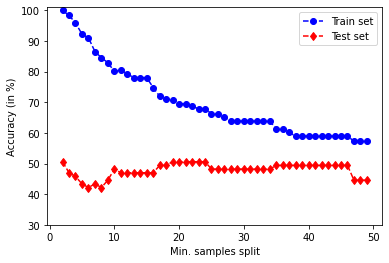

In [301]:
import matplotlib.pyplot as plt

train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train_TRAIN,y_train_TRAIN)
    train.append(ad.score(X_train_TRAIN,y_train_TRAIN)*100)
    test.append(ad.score(X_test_TRAIN,y_test_TRAIN)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(30,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

O melhor valor a ser selecionado é quando o train set e o test set se aproximam mais no accuracy. Pare evitar um underfit ou overfit.

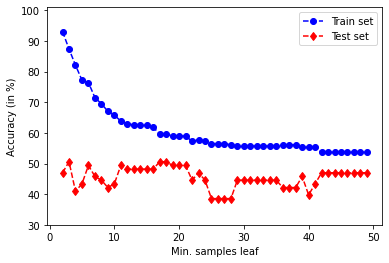

In [302]:
train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i)
    ad = ad.fit(X_train_TRAIN,y_train_TRAIN)
    train.append(ad.score(X_train_TRAIN,y_train_TRAIN)*100)
    test.append(ad.score(X_test_TRAIN,y_test_TRAIN)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(30,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples leaf') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

O melhor valor a ser selecionado é quando o train set e o test set se aproximam mais no accuracy. Pare evitar um underfit ou overfit.

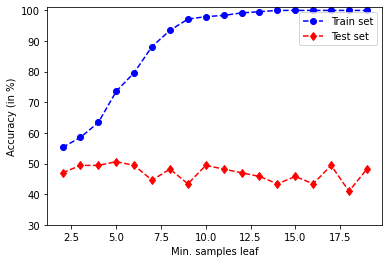

In [303]:
train = []
test = []
for i in range(2,20):
    ad = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    ad = ad.fit(X_train_TRAIN,y_train_TRAIN)
    train.append(ad.score(X_train_TRAIN,y_train_TRAIN)*100)
    test.append(ad.score(X_test_TRAIN,y_test_TRAIN)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,20,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(30,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples leaf') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

O melhor valor a ser selecionado é quando o train set e o test set se aproximam mais no accuracy. Pare evitar um underfit ou overfit.

#### Validação com o F1-Macro score parametro max-depth e cross validation = 5

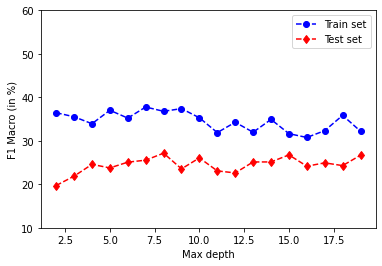

Melhor média do test f1_macro: 27.160142489089857 em max_depth i = [8] 


In [304]:
from sklearn.model_selection import cross_val_score

train = []
test = []
for i in range(2,20):
    ad = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    ad = ad.fit(X_train_TRAIN,y_train_TRAIN)
    scores_train = cross_val_score(ad,
                             X= X_train_TRAIN,
                             y= y_train_TRAIN,
                             cv =5,
                             scoring='f1_macro')
    
    scores_test = cross_val_score(ad,
                             X= X_test_TRAIN,
                             y= y_test_TRAIN,
                             cv =5,
                             scoring='f1_macro')

    train.append(np.mean(scores_train)*100)
    test.append(np.mean(scores_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,20,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(10,60) # limite dos eixo dos yy's
plt.xlabel('Max depth') # legenda do eixo dos xx's
plt.ylabel('F1 Macro (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

#print(test)
max_val_test = np.max(test)
index_max = np.where(test == max_val_test)
idx = index_max[0] + 2
print (f"Melhor média do test f1_macro: {max_val_test} em max_depth i = {idx} ")

O melhor valor a ser selecionado é quando o train set e o test set se aproximam mais no f1 macro. Pare evitar um underfit ou overfit.

#### Validação com o F1-Macro score parametro min samples leaf e cross validation = 5

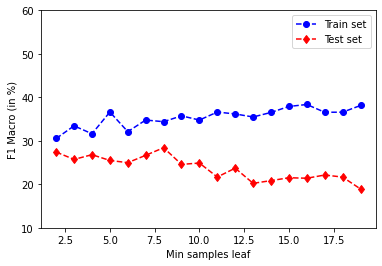

Melhor média do test f1_macro: 28.413907987437398 em min_samples_leaf i = [8] 


In [305]:
from sklearn.model_selection import cross_val_score

train = []
test = []
for i in range(2,20):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i)
    ad = ad.fit(X_train_TRAIN,y_train_TRAIN)
    scores_train = cross_val_score(ad,
                             X= X_train_TRAIN,
                             y= y_train_TRAIN,
                             cv =5,
                             scoring='f1_macro')
    
    scores_test = cross_val_score(ad,
                             X= X_test_TRAIN,
                             y= y_test_TRAIN,
                             cv =5,
                             scoring='f1_macro')

    train.append(np.mean(scores_train)*100)
    test.append(np.mean(scores_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,20,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(10,60) # limite dos eixo dos yy's
plt.xlabel('Min samples leaf') # legenda do eixo dos xx's
plt.ylabel('F1 Macro (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

#print(test)
max_val_test = np.max(test)
index_max = np.where(test == max_val_test)
idx = index_max[0] + 2
print (f"Melhor média do test f1_macro: {max_val_test} em min_samples_leaf i = {idx} ")

O melhor valor a ser selecionado é quando o train set e o test set se aproximam mais no f1 macro. Pare evitar um underfit ou overfit.

#### Validação com o F1-Macro score parametro min samples split e cross validation = 5

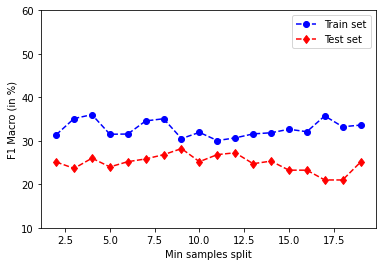

Melhor média do test f1_macro: 28.212243166190532 em min_samples_split i = [9] 


In [306]:
from sklearn.model_selection import cross_val_score

train = []
test = []
for i in range(2,20):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train_TRAIN,y_train_TRAIN)
    scores_train = cross_val_score(ad,
                             X= X_train_TRAIN,
                             y= y_train_TRAIN,
                             cv =5,
                             scoring='f1_macro')
    
    scores_test = cross_val_score(ad,
                             X= X_test_TRAIN,
                             y= y_test_TRAIN,
                             cv =5,
                             scoring='f1_macro')

    train.append(np.mean(scores_train)*100)
    test.append(np.mean(scores_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,20,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(10,60) # limite dos eixo dos yy's
plt.xlabel('Min samples split') # legenda do eixo dos xx's
plt.ylabel('F1 Macro (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

#print(test)
max_val_test = np.max(test)
index_max = np.where(test == max_val_test)
idx = index_max[0] + 2
print (f"Melhor média do test f1_macro: {max_val_test} em min_samples_split i = {idx} ")

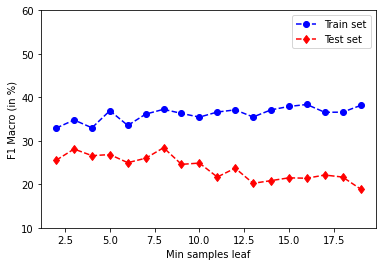

Melhor média do test f1_macro: 28.413907987437398 em min_samples_leaf i = [8] 


In [307]:
from sklearn.model_selection import cross_val_score

train = []
test = []
for i in range(2,20):
    ad = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf=i)
    ad = ad.fit(X_train_TRAIN,y_train_TRAIN)
    scores_train = cross_val_score(ad,
                             X= X_train_TRAIN,
                             y= y_train_TRAIN,
                             cv =5,
                             scoring='f1_macro')
    
    scores_test = cross_val_score(ad,
                             X= X_test_TRAIN,
                             y= y_test_TRAIN,
                             cv =5,
                             scoring='f1_macro')

    train.append(np.mean(scores_train)*100)
    test.append(np.mean(scores_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,20,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(10,60) # limite dos eixo dos yy's
plt.xlabel('Min samples leaf') # legenda do eixo dos xx's
plt.ylabel('F1 Macro (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

#print(test)
max_val_test = np.max(test)
index_max = np.where(test == max_val_test)
idx = index_max[0] + 2
print (f"Melhor média do test f1_macro: {max_val_test} em min_samples_leaf i = {idx} ")

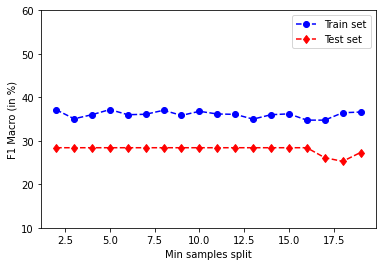

Melhor média do test f1_macro: 28.413907987437398 em min_samples_split i = [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 


In [308]:
from sklearn.model_selection import cross_val_score

train = []
test = []
for i in range(2,20):
    ad = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf= 8 , min_samples_split = i)
    ad = ad.fit(X_train_TRAIN,y_train_TRAIN)
    scores_train = cross_val_score(ad,
                             X= X_train_TRAIN,
                             y= y_train_TRAIN,
                             cv =5,
                             scoring='f1_macro')
    
    scores_test = cross_val_score(ad,
                             X= X_test_TRAIN,
                             y= y_test_TRAIN,
                             cv =5,
                             scoring='f1_macro')

    train.append(np.mean(scores_train)*100)
    test.append(np.mean(scores_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,20,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(10,60) # limite dos eixo dos yy's
plt.xlabel('Min samples split') # legenda do eixo dos xx's
plt.ylabel('F1 Macro (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

#print(test)
max_val_test = np.max(test)
index_max = np.where(test == max_val_test)
idx = index_max[0] + 2
print (f"Melhor média do test f1_macro: {max_val_test} em min_samples_split i = {idx} ")

In [309]:
#cross validation k-folds 5 para o max_depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

ad1 = DecisionTreeClassifier(criterion='entropy')
ad1.fit(X_train,y_train)
scores = cross_val_score(ad1,
                             X= X_train,
                             y= y_train,
                             cv =5,
                             scoring='f1_macro')
print (f"Melhor média f1_macro: {np.mean(scores)}  ")
print('Profundidade da árvore obtida:', ad1.get_depth())
print('Número de folhas da árvore obtida:', ad1.get_n_leaves()) 


Melhor média f1_macro: 0.36838438685417174  
Profundidade da árvore obtida: 12
Número de folhas da árvore obtida: 95


#### criacoes de modelos com o cross validation e diferentes parametros com F1 macro scores sem o split test

In [310]:
#cross validation k-folds 5 para o max_depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
tot_scores = []
for i in range(20):
    ad2 = DecisionTreeClassifier(criterion='entropy', max_depth = i + 1)
    scores = cross_val_score(ad2,
                             X= X_train,
                             y= y_train,
                             cv =5,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
max_depth_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em max_depth i = {max_depth_i} ")

F1 macro scores:
[0.25885517403667724, 0.2974212859453938, 0.31593204160071275, 0.33546965500937065, 0.3704417654604797, 0.3651387525222604, 0.33673601029613437, 0.3277867915127383, 0.34248925378892087, 0.34018970000341286, 0.3553933578221955, 0.35247733666157555, 0.3716233724646985, 0.3541261956643682, 0.36279575742012543, 0.3436644599685663, 0.35848599266016945, 0.3832979720054598, 0.36346038668734704, 0.3652800912607684]
Melhor média f1_macro: 0.3832979720054598 em max_depth i = [18] 


In [311]:
#cross validation k-folds 10 para o max_depth
tot_scores = []
for i in range(20):
    ad2_1 = DecisionTreeClassifier(criterion='entropy', max_depth = i + 1)
    scores = cross_val_score(ad2_1,
                             X= X_train,
                             y= y_train,
                             cv =10,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
max_depth_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em max_depth i = {max_depth_i} ")

F1 macro scores:
[0.250382657606636, 0.2757762281475241, 0.2970754308510334, 0.32809164108178107, 0.35441297272528327, 0.4097147024935782, 0.3505773951430332, 0.34649663072287973, 0.35992390014761205, 0.35861624554047833, 0.36529743954097127, 0.3700018469699786, 0.3533202014892263, 0.35577385875362527, 0.35353802426416514, 0.3389525791589495, 0.34725003694232787, 0.34388618800496823, 0.33653582699013934, 0.3558034490774371]
Melhor média f1_macro: 0.4097147024935782 em max_depth i = [6] 


In [312]:
#cross validation 5 para o min samples split

tot_scores = []
for i in range(20):
    ad3 = DecisionTreeClassifier(criterion='entropy', min_samples_split = i + 2)
    scores = cross_val_score(ad3,
                             X= X_train,
                             y= y_train,
                             cv = 5,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_split_i = index_max[0] + 2
print (f"Melhor média f1_macro: {max_val} em min_samples_split_i = {min_samples_split_i} ")

F1 macro scores:
[0.3592996985410434, 0.33938776718433183, 0.37324641537732417, 0.3653349922420265, 0.37649635618874344, 0.38261518412377316, 0.363747699066737, 0.3547226673061889, 0.36643386497932423, 0.3734207541432582, 0.3721495726813709, 0.36564346368488787, 0.3570540140941796, 0.35834100704389493, 0.38560195927117197, 0.3965078462985824, 0.37846018850330393, 0.38243538731616955, 0.37735507926168327, 0.37664882943195843]
Melhor média f1_macro: 0.3965078462985824 em min_samples_split_i = [17] 


In [313]:
#cross validation 10 para o min samples split

tot_scores = []
for i in range(20):
    ad3 = DecisionTreeClassifier(criterion='entropy', min_samples_split = i + 2)
    scores = cross_val_score(ad3,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_split_i = index_max[0] + 2
print (f"Melhor média f1_macro: {max_val} em min_samples_split_i = {min_samples_split_i} ")

F1 macro scores:
[0.32493332634245575, 0.3339701447836375, 0.3504840762665722, 0.3432883227429084, 0.35114001375426196, 0.35271835010013036, 0.33587324595373647, 0.330286005677321, 0.34310343016347356, 0.33087858302825957, 0.35041017494222143, 0.36768203980678626, 0.36364346669264896, 0.3733270337680833, 0.36564226948197626, 0.38160423031121393, 0.36015261816190036, 0.36443167244095465, 0.34560273672871905, 0.34475359758076063]
Melhor média f1_macro: 0.38160423031121393 em min_samples_split_i = [17] 


In [314]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = i + 1)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 5,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_leaf_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em min_samples_leaf_i = {min_samples_leaf_i} ")

F1 macro scores:
[0.3571945486950779, 0.373278375228861, 0.3664848157453596, 0.38049833394739335, 0.359021705923187, 0.350493261806022, 0.321493348178117, 0.319976903909391, 0.3383923081021087, 0.3316756781936226, 0.33915180542625956, 0.3355033770637541, 0.3574580313770423, 0.34740444175552804, 0.3369568560607251, 0.3381995721369492, 0.329028794271801, 0.3289252036527589, 0.3423079421811487, 0.354817120002067]
Melhor média f1_macro: 0.38049833394739335 em min_samples_leaf_i = [4] 


In [315]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = i + 1)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_leaf_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em min_samples_leaf_i = {min_samples_leaf_i} ")

F1 macro scores:
[0.34357311746792396, 0.33771589073787517, 0.3746425084446521, 0.33019310895289566, 0.33970560040590464, 0.36521238633215347, 0.37998356543512646, 0.3578503584408728, 0.3229789305609825, 0.34879956170498294, 0.3506264202132855, 0.32556270626297107, 0.32020724348254337, 0.3193148850721256, 0.30937415714900773, 0.32065983779191815, 0.3219751015237409, 0.3294331055742346, 0.3305824389845465, 0.33365195232907857]
Melhor média f1_macro: 0.37998356543512646 em min_samples_leaf_i = [7] 


In [316]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf = i + 1)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 5,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_leaf_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em min_samples_leaf_i = {min_samples_leaf_i} ")

F1 macro scores:
[0.36192567369192663, 0.3576352964792576, 0.3615918161330972, 0.36733643522096165, 0.3624563863896165, 0.34964359944209866, 0.3389487107560532, 0.35177020828388816, 0.3564198381093931, 0.3246245856622082, 0.34847013077131883, 0.3328741153076823, 0.3571197847637507, 0.34740444175552804, 0.3369568560607251, 0.3381995721369492, 0.329028794271801, 0.3289252036527589, 0.3423079421811487, 0.354817120002067]
Melhor média f1_macro: 0.36733643522096165 em min_samples_leaf_i = [4] 


In [317]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf = i + 1)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_leaf_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em min_samples_leaf_i = {min_samples_leaf_i} ")

F1 macro scores:
[0.37692997088288643, 0.3898115538646258, 0.38417982523392996, 0.37456411872044054, 0.3447445391941867, 0.35114015051210556, 0.3693166828302628, 0.3445267721274489, 0.339335802566579, 0.34990835186905517, 0.3490519541985918, 0.3234496110248758, 0.32020724348254337, 0.31982110679158265, 0.31021952888253734, 0.3162906884227688, 0.31930592859141005, 0.3334528177461207, 0.3305824389845465, 0.33365195232907857]
Melhor média f1_macro: 0.3898115538646258 em min_samples_leaf_i = [2] 


In [318]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_split = i + 2)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 5,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_split_i = index_max[0] + 2
print (f"Melhor média f1_macro: {max_val} em min_samples_split_i = {min_samples_split_i} ")

F1 macro scores:
[0.3646308514005093, 0.3596226145539934, 0.36161416434160437, 0.36751796086427235, 0.3569481699108237, 0.357720460925226, 0.3581960845165946, 0.3615108104147321, 0.36798594959718645, 0.36724609307241435, 0.38331527145721916, 0.38331527145721916, 0.3703012208624024, 0.3780894905460378, 0.3941618078075278, 0.40099541542755424, 0.39232678929870773, 0.3832678212673752, 0.3819097452196504, 0.38352300476272866]
Melhor média f1_macro: 0.40099541542755424 em min_samples_split_i = [17] 


In [319]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_split = i + 2)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_split_i = index_max[0] + 2
print (f"Melhor média f1_macro: {max_val} em min_samples_split_i = {min_samples_split_i} ")

F1 macro scores:
[0.392995705027531, 0.40162434070575276, 0.38383167443426336, 0.3782056789585612, 0.37929274226394727, 0.3790381607014902, 0.3868163535401637, 0.38422259750085636, 0.38815120110588475, 0.3738346937368792, 0.38700572567132474, 0.40084282575945257, 0.387592491678865, 0.4025053352634174, 0.3967450610225842, 0.40314259801832214, 0.3896764418882551, 0.39097091176243987, 0.3691951769059406, 0.36732124721367476]
Melhor média f1_macro: 0.40314259801832214 em min_samples_split_i = [17] 


In [320]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf = 2 ,min_samples_split = i + 2)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 5,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_split_i = index_max[0] + 2
print (f"Melhor média f1_macro: {max_val} em min_samples_split_i = {min_samples_split_i} ")

F1 macro scores:
[0.35253068780476166, 0.3411527786964763, 0.3542410671284649, 0.3506785198131509, 0.34503717846957543, 0.34903689301245433, 0.3467158189817625, 0.360877829096954, 0.3630979331185041, 0.3717068013456226, 0.37361716381173543, 0.3739707262966912, 0.3721427509170472, 0.37846595534473376, 0.39953689269874176, 0.4044079784125786, 0.3966555580461426, 0.3754999861492302, 0.37001353608088994, 0.3894801701569869]
Melhor média f1_macro: 0.4044079784125786 em min_samples_split_i = [17] 


In [321]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf = 2 ,min_samples_split = i + 2)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_split_i = index_max[0] + 2
print (f"Melhor média f1_macro: {max_val} em min_samples_split_i = {min_samples_split_i} ")

F1 macro scores:
[0.3867155792339461, 0.37202677519262733, 0.3966909560768267, 0.3672821335405668, 0.3900992204415653, 0.38139122266118636, 0.37366234360516304, 0.3769932449465477, 0.37648560443447304, 0.385588910469184, 0.38400699920607734, 0.3853710966708893, 0.39316349408656065, 0.38545002474620954, 0.39830109923231416, 0.39959086534278815, 0.3840032739930897, 0.3891059504512578, 0.3660867948843948, 0.3702265918690194]
Melhor média f1_macro: 0.39959086534278815 em min_samples_split_i = [17] 


In [322]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf = i + 1 ,min_samples_split = 17)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 5,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_leaf_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em min_samples_leaf_i = {min_samples_leaf_i} ")

F1 macro scores:
[0.3961491079405934, 0.40453342644125245, 0.39829696439429096, 0.39604403330532595, 0.3663283384576285, 0.3586125169207633, 0.357462819670347, 0.35177020828388816, 0.3564198381093931, 0.3334100558056005, 0.34127702027650053, 0.32155866192326343, 0.3571197847637507, 0.34740444175552804, 0.3369568560607251, 0.3381995721369492, 0.329028794271801, 0.3289252036527589, 0.3423079421811487, 0.354817120002067]
Melhor média f1_macro: 0.40453342644125245 em min_samples_leaf_i = [2] 


In [323]:
tot_scores = []
for i in range(20):
    ad4 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf = i + 1 ,min_samples_split = 17)
    scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_leaf_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em min_samples_leaf_i = {min_samples_leaf_i} ")

F1 macro scores:
[0.40488812221452897, 0.3996981853091786, 0.3954413375366821, 0.3795236507770946, 0.3645066032179035, 0.362839386875485, 0.36586240689603156, 0.3471800018704325, 0.339335802566579, 0.34399841920912244, 0.3490519541985918, 0.32556270626297107, 0.31654983607513587, 0.31982110679158265, 0.31021952888253734, 0.3162906884227688, 0.31930592859141005, 0.3294331055742346, 0.3305824389845465, 0.33365195232907857]
Melhor média f1_macro: 0.40488812221452897 em min_samples_leaf_i = [1] 


In [324]:
tot_scores = []
for i in range(20):
    ad5 = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf = i + 1 ,min_samples_split = 4)
    scores = cross_val_score(ad5,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
    tot_scores.append(np.mean(scores))
print('F1 macro scores:')
print(tot_scores)
max_val = np.max(tot_scores)
index_max = np.where(tot_scores == max_val)
min_samples_leaf_i = index_max[0] + 1
print (f"Melhor média f1_macro: {max_val} em min_samples_leaf_i = {min_samples_leaf_i} ")

F1 macro scores:
[0.3682465312343913, 0.3640758141450209, 0.3787449729904964, 0.38681899994831664, 0.3484898187418077, 0.36890486735251365, 0.36470693549493455, 0.3622831638134806, 0.35786933301819657, 0.3678449939090357, 0.3854095706813799, 0.3552202922537452, 0.3449002686919666, 0.33836285685600004, 0.3285291237858704, 0.33204478851302616, 0.3289763009603274, 0.3314423282356312, 0.33259166164594306, 0.33365195232907857]
Melhor média f1_macro: 0.38681899994831664 em min_samples_leaf_i = [4] 


#### Previsoes das melhores métricas

##### Avaliacoes sem split test

In [325]:
#competicao score = 0.37625

arvore_decisao_1 =DecisionTreeClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 17)
arvore_decisao_1.fit(X_train, y_train) #treinar o modelo, o xDum sao os valores da tabela e o y é a classe / stage
y_test_previsao_1 = arvore_decisao_1.predict(X_test) #vai prever com os dados que ele tem os Y_test
#y_train_previsao = arvore_decisao_1.predict(X_train)
#formato txt para submissao na competicao
#print("Stage")
#for item in y_test_previsao:
#    print(item)

In [326]:
#competicao Score: 0.40014

ad2 =DecisionTreeClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 4)
scores = cross_val_score(ad2,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')

avg_score = np.mean(scores)
print (f" média f1_macro: {avg_score}")


ad2.fit(X_train, y_train) #treinar o modelo, o xDum sao os valores da tabela e o y é a classe / stage
y_test_previsao_2 = ad2.predict(X_test) #vai prever com os dados que ele tem os Y_test
#formato txt para submissao na competicao

#print("Stage")
#for item in y_test_previsao_2:
#    print(item)

 média f1_macro: 0.38171471797863765


In [327]:
#competition Score: 0.40367
ad3 =DecisionTreeClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 4, min_samples_leaf = 3)
scores = cross_val_score(ad3,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')

avg_score = np.mean(scores)
print (f" média f1_macro: {avg_score}")


ad3.fit(X_train, y_train) #treinar o modelo, o xDum sao os valores da tabela e o y é a classe / stage
y_test_previsao_3 = ad3.predict(X_test) #vai prever com os dados que ele tem os Y_test
#formato txt para submissao na competicao

#print("Stage")
#for item in y_test_previsao_3:
#    print(item)

 média f1_macro: 0.3906865128563163


In [328]:
#competition Score: 0.38125
ad4 =DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_split = 4, min_samples_leaf = 3)
scores = cross_val_score(ad4,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')

avg_score = np.mean(scores)
print (f" média f1_macro: {avg_score}")


ad4.fit(X_train, y_train) #treinar o modelo, o xDum sao os valores da tabela e o y é a classe / stage
y_test_previsao_4 = ad4.predict(X_test) #vai prever com os dados que ele tem os Y_test
#formato txt para submissao na competicao

#print("Stage")
#for item in y_test_previsao_4:
#  print(item)

 média f1_macro: 0.37809260956009105


#### Avaliacao com os dados do split test

In [329]:
#COM SPLIT TEST
#comp Score: 0.32357
from sklearn.metrics import confusion_matrix

dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_split = 7, min_samples_leaf = 8 )
dtc1.fit(X_train_TRAIN,y_train_TRAIN)

print("Accuracy: %.3f" % dtc1.score(X_test_TRAIN,y_test_TRAIN))
y_preds = dtc1.predict(X_test_TRAIN)
print("\nMatriz de Confusão")
pd.DataFrame(confusion_matrix(y_test_TRAIN, y_preds), columns=[1,2,3,4], index=[1,2,3,4])

Accuracy: 0.470

Matriz de Confusão


,1,2,3,4
1,0,1,2,2
2,0,6,9,4
3,1,3,21,10
4,2,5,5,12


Na matriz de confusão os Stages da esquerda são a classes previstas. Na horizontal os Stages são o true stage. Para avaliar estes dados se são confiaveis ou não olhamos se a matriz tem muitos valores na diagonal pois são os true positives e true negatives. A partir da matriz de confusão é possivel determinar métricas como o precision e o recall por classe. Também temos o classification report que apresenta os valores para diferentes métricas como o f1-score macro que é o mais relevante para nós.

In [330]:
from sklearn.metrics import classification_report
print(classification_report(y_test_TRAIN, y_preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.40      0.32      0.35        19
           3       0.57      0.60      0.58        35
           4       0.43      0.50      0.46        24

    accuracy                           0.47        83
   macro avg       0.35      0.35      0.35        83
weighted avg       0.45      0.47      0.46        83



#### 2.1.2 K-Vizinhos mais proximos

Podemos usar random state diferentes para obter outros resultados (por ser um conjunto diferente)

In [331]:
X_train_TRAIN, X_test_TRAIN, y_train_TRAIN, y_test_TRAIN = train_test_split(X_train,
                                                            y_train,
                                                            random_state=2)

#### criacao de varios modelos de neighbors diferentes com cross-validation 5 para testar qual deles tem o melhor f1 macro score

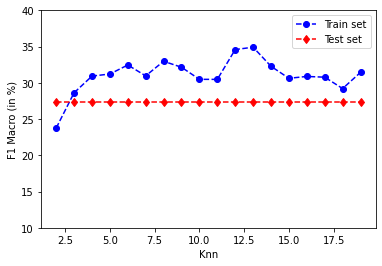

Melhor média do test f1_macro: 27.314213564213564 em knn i = [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 


In [332]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

train = []
test = []
for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train_TRAIN,y_train_TRAIN)
    scores_train = cross_val_score(knn,
                             X= X_train_TRAIN,
                             y= y_train_TRAIN,
                             cv =5,
                             scoring='f1_macro')
    
    scores_test = cross_val_score(ad,
                             X= X_test_TRAIN,
                             y= y_test_TRAIN,
                             cv =5,
                             scoring='f1_macro')

    train.append(np.mean(scores_train)*100)
    test.append(np.mean(scores_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,20,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(10,40) # limite dos eixo dos yy's
plt.xlabel('Knn') # legenda do eixo dos xx's
plt.ylabel('F1 Macro (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

#print(test)
max_val_test = np.max(test)
index_max = np.where(test == max_val_test)
idx = index_max[0] + 2
print (f"Melhor média do test f1_macro: {max_val_test} em knn i = {idx} ")

Temos um score muito baixo, portanto vamos fazer uma normalização dos dados para ver se obtemos melhores resultados.

#### Normalizacao do Knn para ver se obtemos melhores resultados

Normalizacao para cv = 5

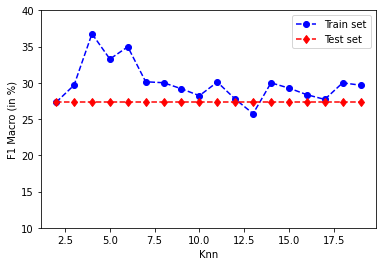

Melhor média do test f1_macro: 27.314213564213564 em knn i = [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 


In [333]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalizacao = scaler.transform(X_train_TRAIN)
X_test_normalicacao = scaler.transform(X_test_TRAIN)

train = []
test = []
for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train_TRAIN,y_train_TRAIN)
    scores_train = cross_val_score(knn,
                             X= X_train_normalizacao,
                             y= y_train_TRAIN,
                             cv =5,
                             scoring='f1_macro')
    
    scores_test = cross_val_score(ad,
                             X= X_test_normalicacao,
                             y= y_test_TRAIN,
                             cv =5,
                             scoring='f1_macro')

    train.append(np.mean(scores_train)*100)
    test.append(np.mean(scores_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,20,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(10,40) # limite dos eixo dos yy's
plt.xlabel('Knn') # legenda do eixo dos xx's
plt.ylabel('F1 Macro (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

#print(test)
max_val_test = np.max(test)
index_max = np.where(test == max_val_test)
idx = index_max[0] + 2
print (f"Melhor média do test f1_macro: {max_val_test} em knn i = {idx} ")


##### b) Validar Modelos

##### Validacao sem normalizacao de dados

In [334]:
knn4 =  KNeighborsClassifier(n_neighbors=6)
knn4.fit(X_train_TRAIN,y_train_TRAIN)

print("Accuracy: %.3f" % knn4.score(X_test_TRAIN,y_test_TRAIN))
y_preds = knn4.predict(X_test_TRAIN)
print("\nMatriz de Confusão")
pd.DataFrame(confusion_matrix(y_test_TRAIN, y_preds), columns=[1,2,3,4], index=[1,2,3,4])

Accuracy: 0.422

Matriz de Confusão


,1,2,3,4
1,0,0,2,3
2,0,6,9,4
3,0,6,17,12
4,1,6,5,12


In [335]:
 print(classification_report(y_test_TRAIN, y_preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.33      0.32      0.32        19
           3       0.52      0.49      0.50        35
           4       0.39      0.50      0.44        24

    accuracy                           0.42        83
   macro avg       0.31      0.33      0.32        83
weighted avg       0.41      0.42      0.41        83



In [336]:
knn5 =  KNeighborsClassifier(n_neighbors=11)
knn5.fit(X_train_TRAIN,y_train_TRAIN)

print("Accuracy: %.3f" % knn5.score(X_test_TRAIN,y_test_TRAIN))
y_preds = knn5.predict(X_test_TRAIN)
print("\nMatriz de Confusão")
pd.DataFrame(confusion_matrix(y_test_TRAIN, y_preds), columns=[1,2,3,4], index=[1,2,3,4])

Accuracy: 0.434

Matriz de Confusão


,1,2,3,4
1,0,0,2,3
2,0,5,9,5
3,0,8,15,12
4,0,3,5,16


In [350]:
 print(classification_report(y_test_TRAIN, y_preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        19
           3       0.45      0.43      0.44        35
           4       0.30      0.62      0.41        24

    accuracy                           0.36        83
   macro avg       0.19      0.26      0.21        83
weighted avg       0.28      0.36      0.30        83



##### Validacao com normalizacao de dados

In [338]:
knn6 =  KNeighborsClassifier(n_neighbors=7)
knn6.fit(X_train_normalizacao,y_train_TRAIN)

print("Accuracy: %.3f" % knn6.score(X_test_TRAIN,y_test_TRAIN))
y_preds = knn6.predict(X_test_TRAIN)
print("\nMatriz de Confusão")
pd.DataFrame(confusion_matrix(y_test_TRAIN, y_preds), columns=[1,2,3,4], index=[1,2,3,4])

Accuracy: 0.361

Matriz de Confusão


,1,2,3,4
1,0,0,2,3
2,0,0,7,12
3,0,0,15,20
4,0,0,9,15


In [351]:
 print(classification_report(y_test_TRAIN, y_preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        19
           3       0.45      0.43      0.44        35
           4       0.30      0.62      0.41        24

    accuracy                           0.36        83
   macro avg       0.19      0.26      0.21        83
weighted avg       0.28      0.36      0.30        83



Com a normalizacao dos dados obtemos piores resultados

#### 2.1.2 Naive Bayes
##### a) Criar Modelos

#### Dados categoricos sao feitos com o categoricalNB

In [340]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
nb1_categorical = CategoricalNB(alpha=0.01)
nb1_categorical.fit(hist_clinic_Xdum,y_train)

proba_categorical=nb1_categorical.predict_proba(hist_clinic_Xdum_test)
avg_proba_categorical = np.mean(proba_categorical) 
print("Média de probabilide categorica: ",  avg_proba_categorical)

scores = cross_val_score(nb1_categorical,
                             X= hist_clinic_Xdum,
                             y= y_train,
                             cv = 5,
                             scoring='f1_macro')
avg_f1_score_nb1_categorical = np.mean(scores)
print (f"Média f1_macro: {avg_f1_score_nb1_categorical} em cv = 5")

Média de probabilide categorica:  0.25
Média f1_macro: 0.301839791734114 em cv = 5


In [341]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
nb2_categorical = CategoricalNB(alpha=0.01)
nb2_categorical.fit(hist_clinic_Xdum,y_train)

proba_categorical=nb2_categorical.predict_proba(hist_clinic_Xdum_test)
avg_proba_categorical = np.mean(proba_categorical) 
print("Média de probabilide categorica: ",  avg_proba_categorical)

scores = cross_val_score(nb2_categorical,
                             X= hist_clinic_Xdum,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
avg_f1_score_nb2_categorical = np.mean(scores)
print (f"Média f1_macro: {avg_f1_score_nb2_categorical} em cv = 10")

Média de probabilide categorica:  0.25
Média f1_macro: 0.31167841615515224 em cv = 10


#### Dados continuos sao feitos com o GaussianNB

In [342]:
from sklearn.naive_bayes import GaussianNB

nb1_num = GaussianNB()
nb1_num.fit(hist_clinic_X_non_binary, y_train)

proba_num =nb1_num.predict_proba(hist_clinic_X_non_binary_test)
avg_proba_num= np.mean(proba_num) 
print("Média de probabilide categorica: ",  avg_proba_num)


scores = cross_val_score(nb1_num,
                             X= X_train,
                             y= y_train,
                             cv = 5,
                             scoring='f1_macro')
avg_f1_score_nb1_num = np.mean(scores)
print (f"Média f1_macro: {avg_f1_score_nb1_num} em cv = 5")

Média de probabilide categorica:  0.2500000000000001
Média f1_macro: 0.29367072829033347 em cv = 5


In [343]:
nb2_num = GaussianNB()
nb2_num.fit(hist_clinic_X_non_binary, y_train)


proba_num =nb2_num.predict_proba(hist_clinic_X_non_binary_test)
avg_proba_num= np.mean(proba_num) 
print("Média de probabilide categorica: ",  avg_proba_num)

scores = cross_val_score(nb2_num,
                             X= hist_clinic_X_non_binary,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')
avg_f1_score_nb2_num = np.mean(scores)
print (f"Média f1_macro: {avg_f1_score_nb2_num} em cv = 10")

Média de probabilide categorica:  0.2500000000000001
Média f1_macro: 0.3023312136630215 em cv = 10


Probabilidade do categorical e gaussian juntos

In [344]:
NB_proba =  (avg_proba_categorical * avg_proba_num) / avg_proba_num
print("NB_proba: " ,NB_proba)


NB_proba:  0.25


In [345]:
avg_f1_score_nb1 = avg_f1_score_nb1_categorical * avg_f1_score_nb1_num / avg_f1_score_nb1_num
print('Average f1 macro score nb1: ',avg_f1_score_nb1 )

avg_f1_score_nb2 = (avg_f1_score_nb2_categorical * avg_f1_score_nb1_num ) / avg_f1_score_nb2_num
print('Average f1 macro score nb2: ', avg_f1_score_nb2)

Average f1 macro score nb1:  0.301839791734114
Average f1 macro score nb2:  0.30275017374382485


Scores muito baixos com Naive Bayes

### 2.2. Seleção e apresentação do melhor modelo

(remover) Apresentar todos os resultados para cada modelo obtido

* Elencar o critério de selecção
* Apresentar a árvore (se aplicável)
* Discutir os resultados


O melhor modelo foi o DecisionTree() com melhores resultados no Macro F1-score. Porém o valor do F1-score continuou baixo. Isso pode ser porcausa de termos dados muito complexos.

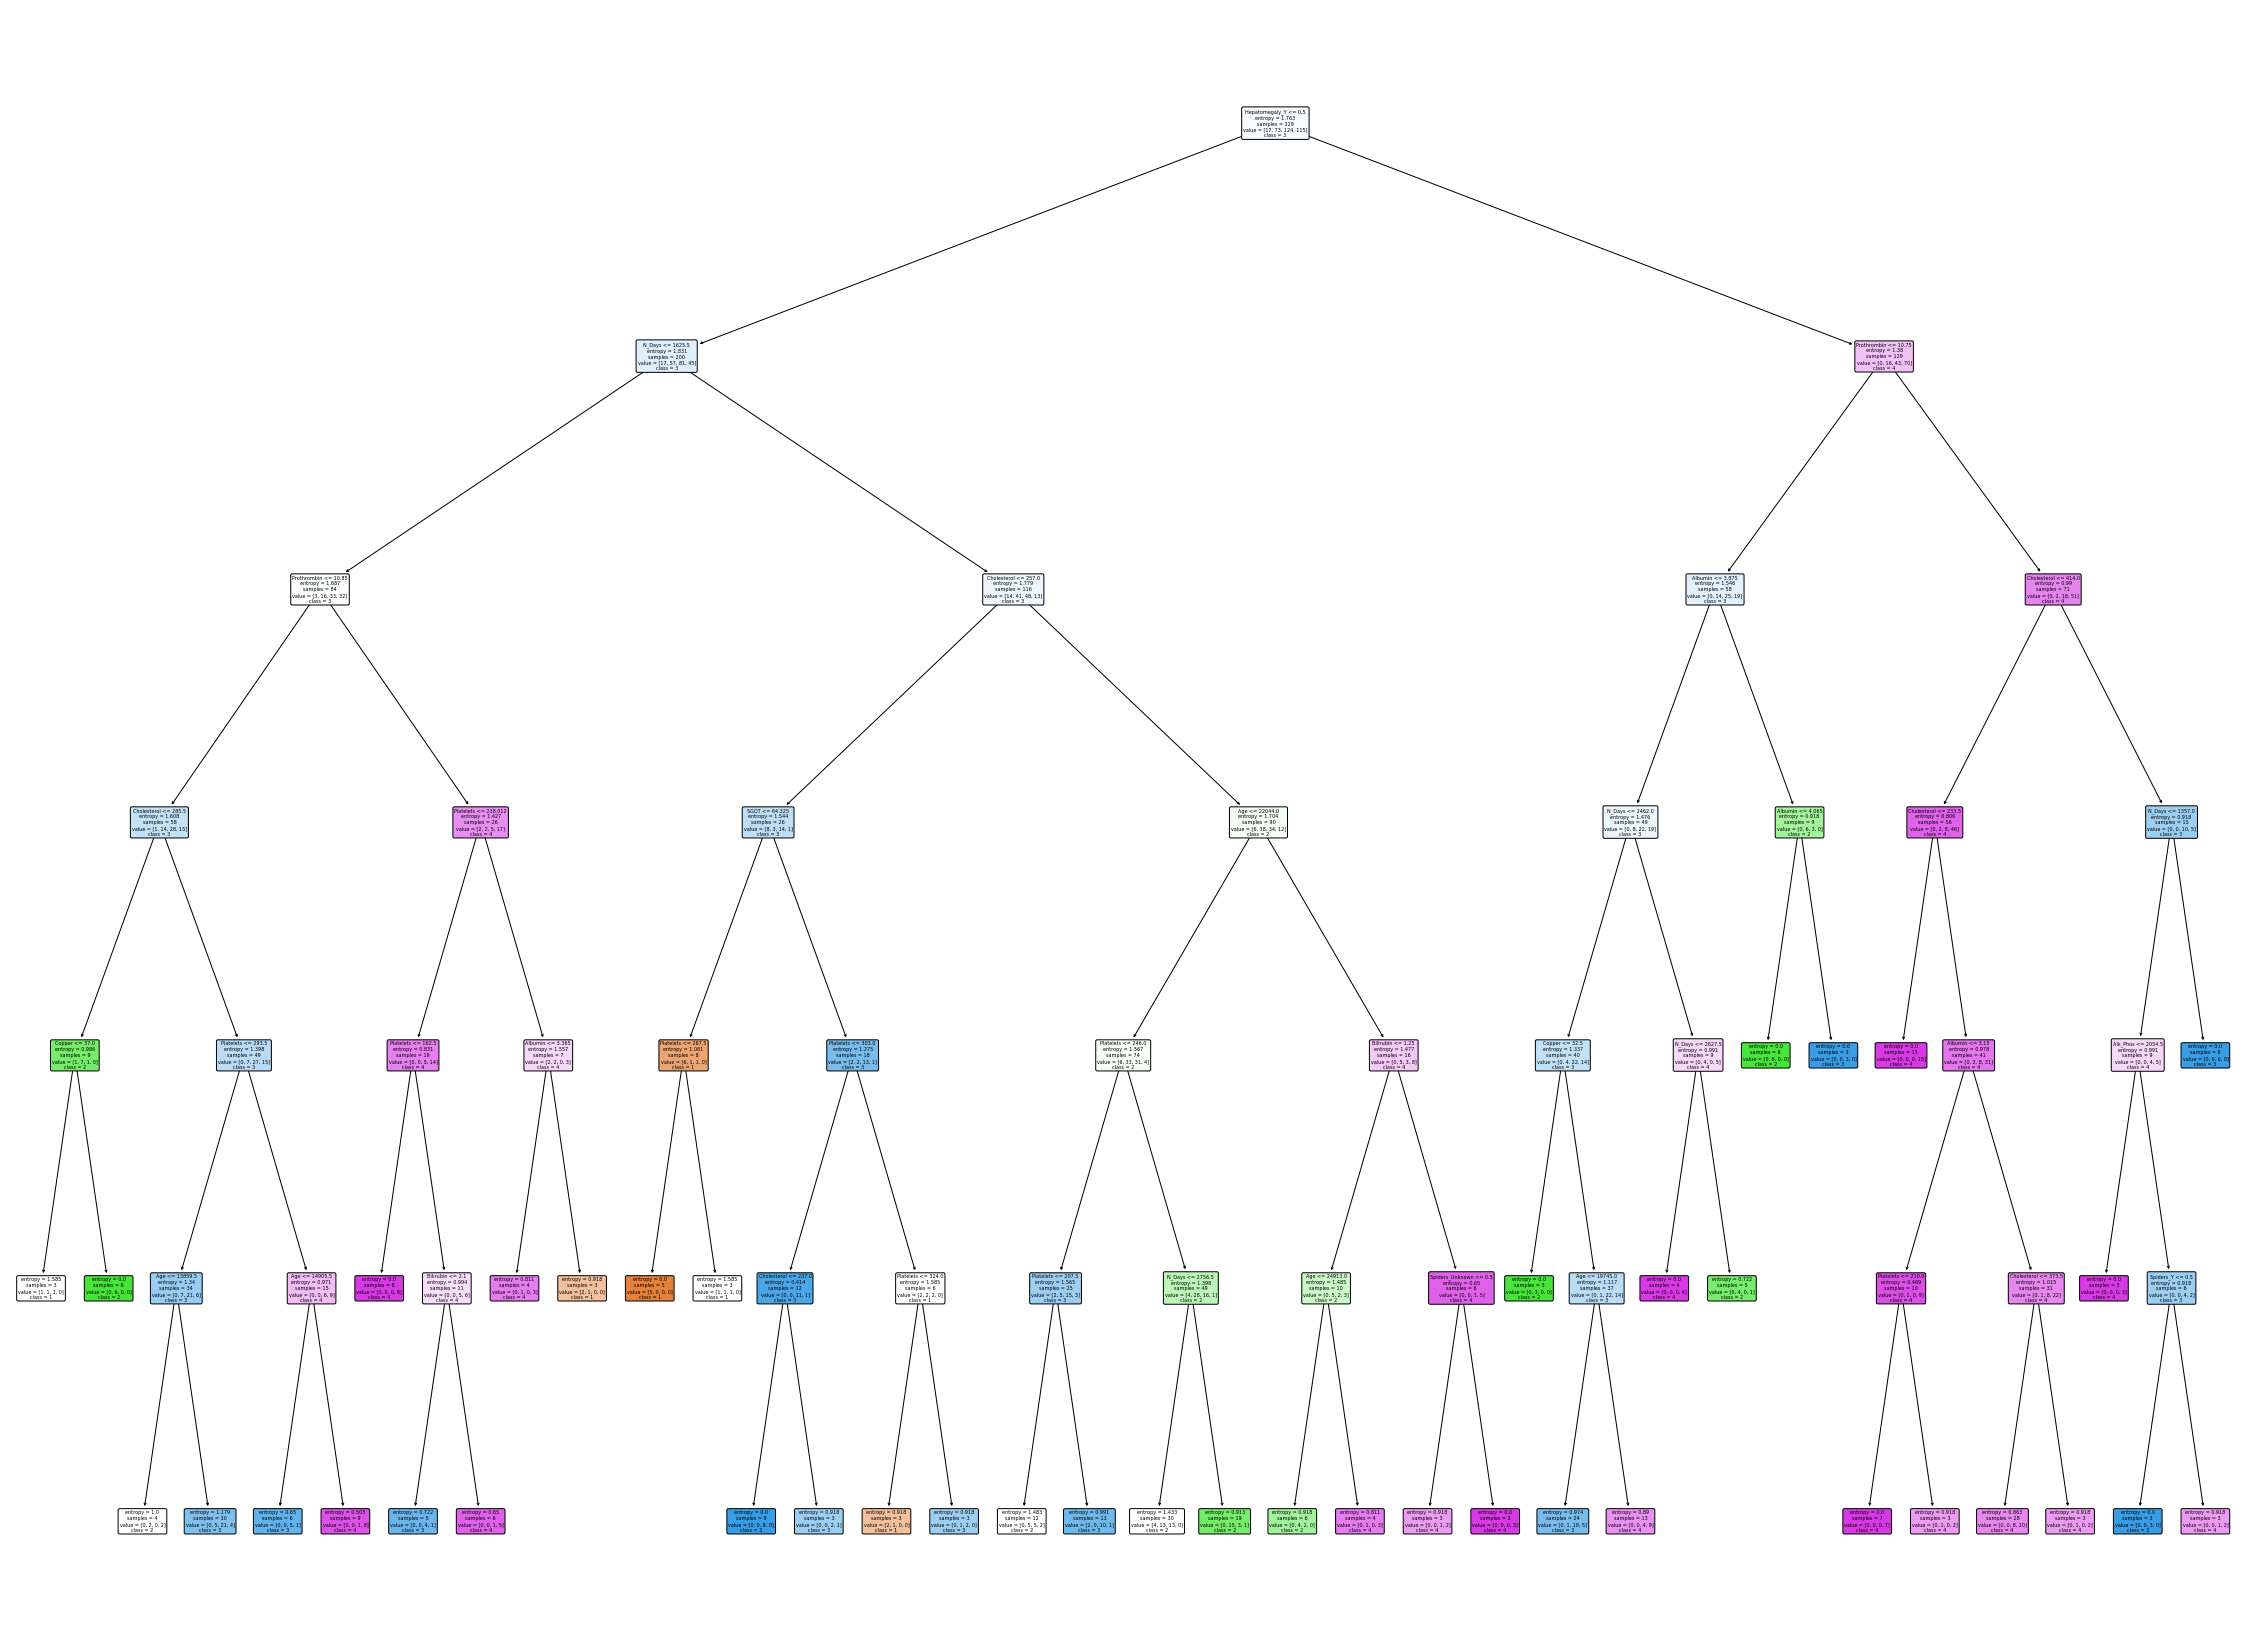

In [346]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
ad3 =DecisionTreeClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 4, min_samples_leaf = 3)
ad3.fit(X_train, y_train) #treinar o modelo, o xDum sao os valores da tabela e o y é a classe / stage
y_test_previsao_3 = ad3.predict(X_test) #vai prever com os dados que ele tem os Y_test
#y_test_previsao_3
#formato txt para submissao na competicao

#print("Stage")
#for item in y_test_previsao_3:
#    print(item)

# Visualizr a árvore de decisão obtida
plt.figure(figsize=[40,30]) # width, height in inches
plot_tree(ad3, 
          feature_names=col_names,
          class_names=['1','2','3','4'],
          filled=True, rounded=True)
plt.show()

## 3. Validação do modelo final ajustado com um conjunto de validação independente

(remover) O ficheiro `test.csv` contém um conjunto de dados não usado para treinar o modelo definido no ponto #2. 
* Preparar o data set
* Correr o modelo selecionado como sendo o melhor nestes dados
* Apresentar os resultados para as métricas de validação
* Discutir os resultados alcançados confrontando os resultados com os obtidos anteriormente

###### A preparação dos dados do X_test foram extraídos e processados no início do relatório.

In [347]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
ad3 =DecisionTreeClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 4, min_samples_leaf = 3)
scores = cross_val_score(ad3,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')

avg_score = np.mean(scores)
print (f" média f1_macro: {avg_score}")


ad3.fit(X_train, y_train) #treinar o modelo, o xDum sao os valores da tabela e o y é a classe / stage
y_test_previsao_3 = ad3.predict(X_test) #vai prever com os dados que ele tem os Y_test
#y_test_previsao_3
#formato txt para submissao na competicao

#print("Stage")
#for item in y_test_previsao_3:
#    print(item)

 média f1_macro: 0.39262362361568526


## 4. Competição

(remover) Explicar os passos feitos para chegar à solução submetida na competição, tendo em conta:

* A escolha dos parâmetros usados pelos classificadores
* A escolha de atributos mais relevantes para a aprendizagem dos modelos
    

Este modelo foi o que teve melhor score 

In [348]:
#competition Score: 0.40367
ad3 =DecisionTreeClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 4, min_samples_leaf = 3)
scores = cross_val_score(ad3,
                             X= X_train,
                             y= y_train,
                             cv = 10,
                             scoring='f1_macro')

avg_score = np.mean(scores)
print (f" média f1_macro: {avg_score}")


ad3.fit(X_train, y_train) #treinar o modelo, o xDum sao os valores da tabela e o y é a classe / stage
y_test_previsao_3 = ad3.predict(X_test) #vai prever com os dados que ele tem os Y_test
y_test_previsao_3
#formato txt para submissao na competicao

#print("Stage")
#for item in y_test_previsao_3:
#    print(item)

 média f1_macro: 0.38357021697726285


array([3, 3, 4, 2, 2, 4, 2, 3, 4, 2, 4, 3, 3, 3, 3, 4, 2, 2, 2, 3, 4, 3,
       4, 2, 4, 2, 3, 4, 3, 3, 4, 4, 4, 2, 2, 2, 4, 4, 3, 4, 4, 4, 4, 2,
       3, 3, 4, 2, 4, 4, 2, 2, 2, 4, 3, 4, 2, 4, 3, 4, 4, 4, 2, 4, 4, 3,
       3, 2, 4, 3, 1, 3, 4, 2, 2, 3, 1, 4, 2, 2, 2, 2, 3])